# Week 3 

## SPARQL: Protocol and RDF Query Language
Specification: https://www.w3.org/TR/sparql11-query/

* 3.1 How to Query RDF(S)
    * Excursion 2: DBpedia Knowledge Graph https://dbpedia.org/snorql/
    * Excursion 3: Wikidata Knowledge Graph https://query.wikidata.org/
* 3.2 Complex Queries with SPARQL
* 3.3 More Complex SPARQL Queries
* 3.4 SPARQL Subqueries and Property Paths
* 3.5 RDF Databases
* 3.6 SPARQL is more than a Query Language

In [148]:
from IPython.display import Image
import urllib
import pandas as pd
import networkx as nx
from graphviz import Digraph
import matplotlib.pyplot as plt
%matplotlib inline

# Preliminaries

## Semantic Web Tools
Jena and Protege are probably the best known, but there are also others:
* https://www.w3.org/wiki/SemanticWebTools#Python_Developers
* https://www.w3.org/2001/sw/wiki/ToolTable

## Graphing tools
Sometimes it helps to visualize the graph. The rdf-grapher service does just that.

https://www.ldf.fi/service/rdf-grapher
    
Usage:   
`http://www.ldf.fi/service/rdf-grapher?rdf=DATA_OR_URI&from=FORMAT&to=FORMAT`

GET/POST parameters:

* rdf	RDF data or URI
* from	input serialization format (ttl, xml, json, nt, trig, nq), default: ttl
* to	output image format (png, svg, pdf, ps, eps, gif, jpg), default: png

Example:   
`http://www.ldf.fi/service/rdf-grapher?rdf=<http://example.com/s>+<http://example.com/p>+<http://example.com/o>+.&from=ttl&to=png`
<img src="https://www.ldf.fi/service/rdf-grapher?rdf=%3Chttp://example.com/s%3E+%3Chttp://example.com/p%3E+%3Chttp://example.com/o%3E+.&from=ttl&to=png">

### Programatic example:

In [21]:
# 3.2 Complex SPARQL Queries Question 1
# url encode the rdf string which will be passed to the query parameter 'rdf'
rdf_string=urllib.parse.quote_plus("""
@prefix schema: <https://schema.org/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix ex: <https://example.org/resource/> .
@prefix dbr: <http://dbpedia.org/resource/> .
@prefix dbo: <http://dbpedia.org/ontology/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex:SpaceForce ex:network dbr:Netflix ;
    schema:genre ex:Space ;
    schema:actor dbr:Steve_Carell,
        dbr:John_Malkovich ;
    schema:datePublished "2020-05-29"^^xsd:date ;
    rdfs:label "Space Force"@en .
ex:The_Office_US schema:genre dbr:Mockumentary ;
    schema:actor dbr:Steve_Carell ,
        dbr:John_Krasinski ;
    ex:episodes "201" ;
    schema:datePublished "2005-03-24"^^xsd:date ;
    rdfs:label "Das Büro"@de ,
        "The Office"@en .
dbr:Westworld ex:network dbr:HBO ;
    schema:genre dbr:Western ;
    ex:episodes "28" ;
    schema:datePublished "2016-10-02"^^xsd:date ;
    schema:isBasedOn dbr:Westworld_\(film\) .
ex:Star_Trek:Picard ex:network ex:CBS ;
    schema:genre ex:Space ;
    ex:episodes "10" ;
    schema:datePublished "2020-03-23"^^xsd:date .
dbr:Bird_Box_\(film\) schema:actor dbr:John_Malkovich ;
    schema:datePublished "2018-11-12"^^xsd:date .
""")

In [69]:
Image(url='http://www.ldf.fi/service/rdf-grapher?rdf='+rdf_string+'&from=ttl&to=png') 

## Query Dbpedia and visualize result
https://dbpedia.org/snorql/

In [143]:
sparql_string=urllib.parse.quote_plus("""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX dbo: <http://dbpedia.org/ontology/>
SELECT ?author ?work
WHERE {
?author rdf:type dbo:Writer ;
dbo:notableWork ?work .
} LIMIT 10
""")

In [144]:
!curl -L -H "Accept: text/html" --request GET "http://dbpedia.org/sparql?default-graph-uri=http://dbpedia.org&query={sparql_string}" > resultTable.html

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   153  100   153    0     0   3825      0 --:--:-- --:--:-- --:--:--  3825
100  2545  100  2545    0     0  19427      0 --:--:-- --:--:-- --:--:-- 19427


In [145]:
# because everything is easier with Pandas:
table=pd.read_html('resultTable.html')[0]
table.head()
# auth = table.iloc(0)[0]['author'].split('/')[-1].replace('_',' ')
# work = table.iloc(0)[0]['work'].split('/')[-1].replace('_',' ')
# print(auth)
# print(work)

,author,work
0,http://dbpedia.org/resource/A._J._Healy,http://dbpedia.org/resource/Tommy_Storm_and_th...
1,http://dbpedia.org/resource/A._J._Healy,http://dbpedia.org/resource/Tommy_Storm
2,http://dbpedia.org/resource/A._S._PatriÄ,http://dbpedia.org/resource/Black_Rock_White_City
3,http://dbpedia.org/resource/Lowell_Cunningham,http://dbpedia.org/resource/The_Men_in_Black_(...
4,http://dbpedia.org/resource/Lu_Xun,http://dbpedia.org/resource/Kong_Yiji


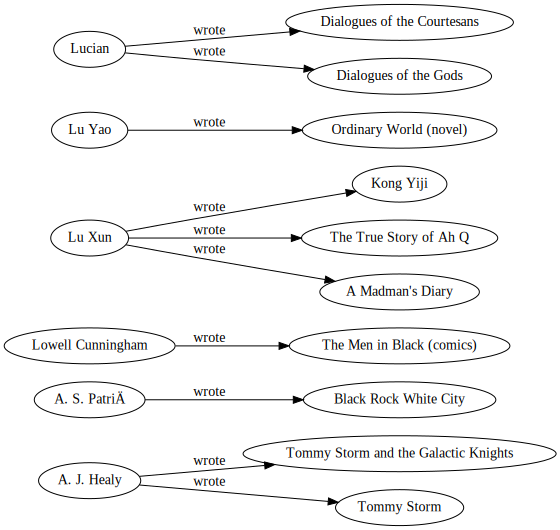

In [146]:
g = Digraph()
g.graph_attr['rankdir'] = 'LR'
g.attr('node', shape='oval')

for row in table.iterrows():
    author = row[1][0].split('/')[-1].replace('_',' ')
    work   = row[1][1].split('/')[-1].replace('_',' ')
    g.node(author)
    g.node(work)
    g.edge(author, work, label="wrote")

g

## Query Wikidata and visualize result
https://query.wikidata.org/

# Exercises

## 3.1
* variables, e.g. `?title, ?author, ?date`
* SELECT statement, e.g. `SELECT ?title ?author ?date`
* Graph Pattern Matching, e.g. `?book dbo:author ?author`
* complex (conjunctive (and)) queries
* solution sequence modifiers
* filter constraints
* Unary Operator Constraints e.g. `FILTER (LANG(?author_name)="en").`

### Example:

```
PREFIX :     <http://dbpedia.org/resource/>
PREFIX rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbo:  <http://dbpedia.org/ontology/>

SELECT ?author_name ?title

FROM <http://dbpedia.org/>

WHERE {
?author rdf:type dbo:Writer .
?author rdfs:label ?author_name .
?author dbo:notableWork ?work .
        ?work rdfs:label ?title .
}
ORDER BY ASC (?author_name)
LIMIT 100
OFFSET 10
```

## 3.2
* SERVICE wikibase:label
{ bd:serviceParam wikibase:language "en" }
* Operators
    * Logical connectives && (AND) and || (OR) for xsd:boolean
    * Comparison operators =, !=, <, >, <=, and >= for numeric datatypes,
    xsd:dateTime, xsd:string, and xsd:boolean
    * Comparison operators = and != for other datatypes
    * Arithmetic operators +, -, *, and / for numeric datatypes
    * REGEX(String,Pattern) or REGEX(String,Pattern,Flags) e.g. `FILTER REGEX (?bookLabel,"earth$","i") .`   
     *(The regular expression language is the same as the XQuery regular expression language which is codified version of that found in Perl)*   
    * sameTERM(A,B)
    * langMATCHES(A,B)
* optional constraint
* logical disjunction - UMION (or)
* negation
    * FILTER NOT EXISTS
    * MINUS
    * !BOUND()

## 3.3
* Fedarated queries SERVICE {}
* variabe assignment e.g. `BIND (YEAR(?date) AS ?year) FILTER (BOUND(?year))`
* Aggragate functions
    * count
    * count(distinct())
    * SUM
    * AVG
    * MIN / MAX
    * SAMPLE
    * GROUP_CONCAT
* GROUP BY




## 3.4 
* Inner subqueries
* Property paths
    * alternatives: match one or both possibilities      
        `{ :book1 dc:title|rdfs:label ?displayString . }`
    * sequence: property path of length >1      
        `{ :alice foaf:knows/foaf:knows/foaf:name ?name . }`
    * inverse property paths: reversing the direction of the triple     
        `{ ?x foaf:mbox <mailto:alice@example> . }`
         ` =`
        `{ <mailto:alice@example> ^foaf:mbox ?x . }`
    * inverse path sequences   
        `{ ?x foaf:knows/^foaf:knows ?y .  FILTER (?x != ?y) }`
    * arbitrary length match (+ one or more; * zero or more).  
        `{ :alice foaf:knows+/foaf:name ?name . }`
    * negated property paths   
        `{ ?x !(rdf:type|^rdf:type) ?y . }`
        

## 3.6
* ASK
* CONSTRUCT
* DESCRIBE